# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from scipy.optimize import minimize

In [2]:
#Download Stock Data 
tickers = ['AAPL', 'GOOG', 'TSLA', 'PLTR', 'LOW', 'QUBT', 'QNST', 'JNJ', 'AMD']

start_date = dt.datetime.today()-dt.timedelta(days=730)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date, auto_adjust = True)

[*********************100%***********************]  9 of 9 completed


In [3]:
print(stock.head())

Price            Close                                                  \
Ticker            AAPL         AMD        GOOG         JNJ         LOW   
Date                                                                     
2023-07-03  190.552155  115.820000  119.847610  153.393616  215.989548   
2023-07-05  189.433334  113.949997  121.905373  152.886536  216.855103   
2023-07-06  189.908569  113.480003  120.215431  151.750290  212.940933   
2023-07-07  188.789780  113.169998  119.430084  149.543533  213.441040   
2023-07-10  186.740326  113.580002  116.179413  149.787674  220.346069   

Price                                                High  ...        Open  \
Ticker           PLTR  QNST  QUBT        TSLA        AAPL  ...        TSLA   
Date                                                       ...               
2023-07-03  15.520000  8.82  1.30  279.820007  191.958076  ...  276.489990   
2023-07-05  15.700000  8.60  1.31  282.480011  191.066972  ...  278.820007   
2023-07-06  15.13

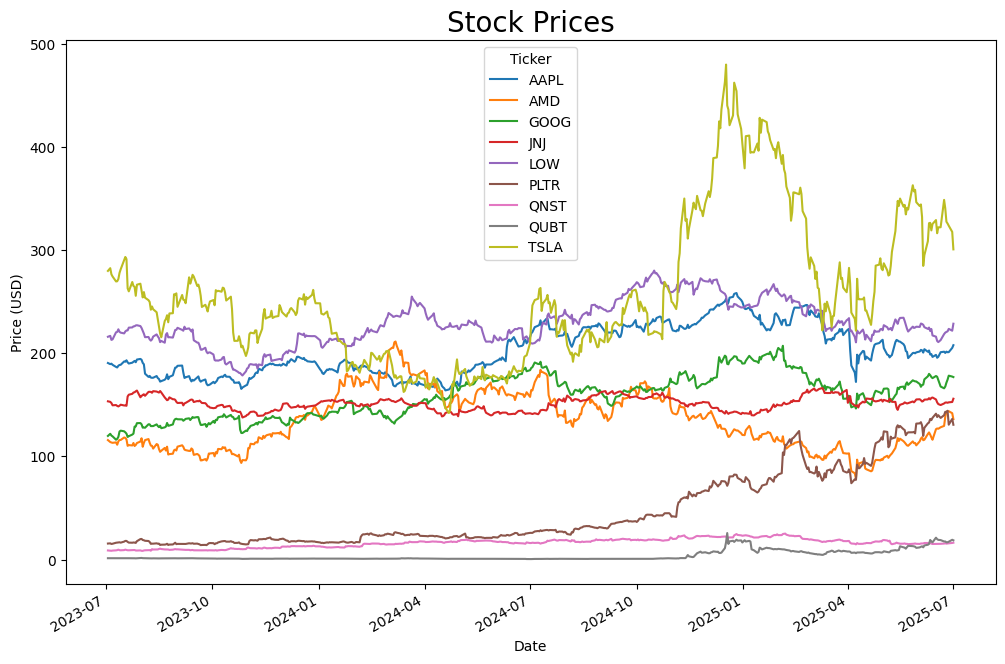

In [4]:
#Plot stock (close) prices together
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 20)
plt.ylabel('Price (USD)')
plt.show()

In [5]:
# Tack on a column that holds the cumulative return of each ticker
close = stock['Close'] 
normalized_returns = close/close.iloc[0]-1 

normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])
                                                                               

if 'Cumulative Return' in stock.columns.get_level_values(0):
    stock = stock.drop(columns='Cumulative Return', level=0)
stock = pd.concat([stock, normalized_returns], axis =1 )

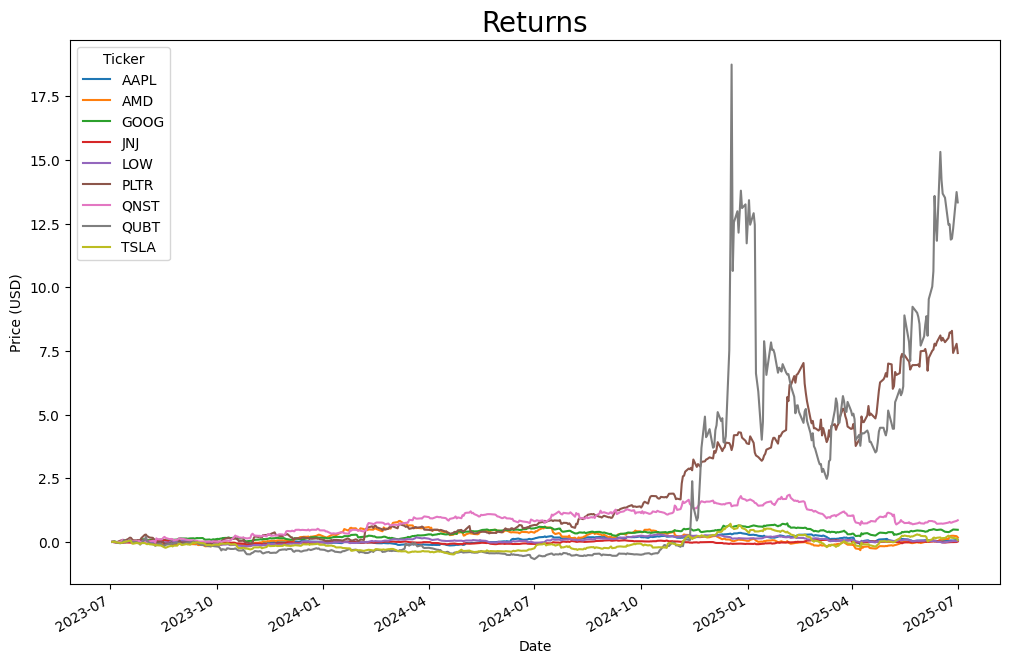

In [6]:
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Returns', size = 20)
plt.ylabel('Price (USD)')
plt.show()

In [7]:
daily_log_returns = np.log(stock['Close']/ stock['Close'].shift(1)).dropna()
print(daily_log_returns.head())


Ticker          AAPL       AMD      GOOG       JNJ       LOW      PLTR  \
Date                                                                     
2023-07-05 -0.005889 -0.016278  0.017024 -0.003311  0.003999  0.011531   
2023-07-06  0.002506 -0.004133 -0.013960 -0.007460 -0.018215 -0.036981   
2023-07-07 -0.005909 -0.002736 -0.006554 -0.014649  0.002346  0.013784   
2023-07-10 -0.010915  0.003616 -0.027595  0.001631  0.031839  0.060701   
2023-07-11 -0.002814 -0.020099  0.007162 -0.005532  0.001352  0.011589   

Ticker          QNST      QUBT      TSLA  
Date                                      
2023-07-05 -0.025260  0.007663  0.009461  
2023-07-06 -0.011696 -0.031010 -0.021252  
2023-07-07  0.024406 -0.007905 -0.007659  
2023-07-10  0.023824 -0.024098 -0.017720  
2023-07-11  0.022174  0.032003  0.000667  


In [8]:
annualized_returns = daily_log_returns.mean() * 252 
print("Annualized expected returns:")
print(annualized_returns)

Annualized expected returns:
Ticker
AAPL    0.043720
AMD     0.081359
GOOG    0.196268
JNJ     0.008233
LOW     0.028687
PLTR    1.073833
QNST    0.310764
QUBT    1.342125
TSLA    0.036288
dtype: float64


In [9]:
volatility = daily_log_returns.std() * np.sqrt(252)

annualized_volatility_pct=(volatility*100).round(2)
print("Annualized Volatility:")
print(annualized_volatility_pct.sort_values(ascending=False))

Annualized Volatility:
Ticker
QUBT    155.24
PLTR     67.75
TSLA     62.95
AMD      49.44
QNST     48.35
GOOG     29.79
AAPL     27.36
LOW      23.01
JNJ      17.68
dtype: float64


In [10]:
cov_matrix = daily_log_returns.cov() * 252
print("Annualized Covariance:")
print(cov_matrix)

Annualized Covariance:
Ticker      AAPL       AMD      GOOG       JNJ       LOW      PLTR      QNST  \
Ticker                                                                         
AAPL    0.074851  0.061538  0.036810  0.001104  0.022062  0.064844  0.028926   
AMD     0.061538  0.244475  0.069850 -0.013112  0.031941  0.133878  0.043908   
GOOG    0.036810  0.069850  0.088751 -0.006278  0.011070  0.063354  0.027037   
JNJ     0.001104 -0.013112 -0.006278  0.031274  0.008460 -0.008620  0.000810   
LOW     0.022062  0.031941  0.011070  0.008460  0.052957  0.036132  0.026650   
PLTR    0.064844  0.133878  0.063354 -0.008620  0.036132  0.458980  0.069553   
QNST    0.028926  0.043908  0.027037  0.000810  0.026650  0.069553  0.233805   
QUBT    0.063756  0.144314  0.054796 -0.007016  0.036237  0.187739  0.019112   
TSLA    0.077411  0.129883  0.074823 -0.010170  0.033045  0.190351  0.074951   

Ticker      QUBT      TSLA  
Ticker                      
AAPL    0.063756  0.077411  
AMD     0

In [11]:
# SPY borrwed from Lecture 4 notebook after the fact! As mentioned there, this is a good litmus test

spy = yf.download('SPY', start = start_date, end =end_date, auto_adjust=True)['Close']

spy_log_returns = np.log(spy / spy.shift(1)).dropna()
spy_log_returns.name = 'SPY' 

aligned_returns = daily_log_returns.join(spy_log_returns, how='inner')

beta = {}

for ticker in daily_log_returns.columns:
    cov = np.cov(aligned_returns[ticker], aligned_returns['SPY'])[0, 1]
    var = np.var(aligned_returns['SPY'])
    beta[ticker] = cov / var

beta_series = pd.Series(beta).sort_values(ascending=False)

print(beta_series)

[*********************100%***********************]  1 of 1 completed

PLTR    2.264531
TSLA    2.262526
QUBT    2.050532
AMD     2.036603
AAPL    1.170270
GOOG    1.099189
QNST    1.088430
LOW     0.732233
JNJ     0.057713
dtype: float64


### Portfolio Optimization:
Now to construct two potentially profitable investment portfolios, we will set few constaints for both 
**High-Risk portfolio** and **Low-Risk Portfolio** and optimize them.

In [12]:
#utility functions for optimization

def portfolio_performance(weights, annualized_returns, cov_matrix):
    port_return = np.dot(weights, annualized_returns) #expected return of portfolio
    port_volatility = np.sqrt(weights.T @ cov_matrix @ weights) #volatility of portfolio
    return port_return, port_volatility

def neg_sharpe_ratio(weights, annualized_returns, cov_matrix, risk_free_rate=0.02):
    ret, vol = portfolio_performance(weights, annualized_returns, cov_matrix)
    return -(ret - risk_free_rate) / vol


#### High-Risk Portfolio Constraints
We consider:
-Full investment
-Volatility >=20%
-Return >=12 %
-at least 30% in high-beta stocks
-P/E ratio >=25

In [13]:
def high_risk_constraints(annualized_returns, cov_matrix, tickers):
    high_beta_stocks = ['TSLA', 'AMD', 'PLTR', 'QUBT']
    high_beta_indices = [tickers.index(t) for t in high_beta_stocks]

    return [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Full investment
        {'type': 'ineq', 'fun': lambda w: np.sqrt(w.T @ cov_matrix @ w) - 0.20},  # Volatility ≥ 20%
        {'type': 'ineq', 'fun': lambda w: np.dot(w, annualized_returns) - 0.12},        # Return ≥ 12%
        {'type': 'ineq', 'fun': lambda w: sum(w[i] for i in high_beta_indices) - 0.30}  # ≥30% in high-beta
    ]


### Low-Risk Portfolio Constraints

In [14]:
def low_risk_constraints(annualized_returns, cov_matrix, tickers):
    high_vol_stocks = ['TSLA', 'AMD', 'PLTR', 'QUBT']
    high_vol_indices = [tickers.index(t) for t in high_vol_stocks]
    defensive_stocks = ['JNJ', 'LOW', 'QNST', 'GOOG']
    defensive_indices = [tickers.index(t) for t in defensive_stocks]

    return [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Full investment
        {'type': 'ineq', 'fun': lambda w: 0.15 - np.sqrt(w.T @ cov_matrix @ w)},  # Volatility ≤ 15%
        {'type': 'ineq', 'fun': lambda w: np.dot(w, annualized_returns) - 0.06},        # Return ≥ 6%
        {'type': 'ineq', 'fun': lambda w: 0.10 - sum(w[i] for i in high_vol_indices)},  # ≤10% in high-vol
        {'type': 'ineq', 'fun': lambda w: sum(w[i] for i in defensive_indices) - 0.40},  # ≥40% in defensive
    ]


In [15]:
#Portfolio Optimize
def optimize_portfolio(annualized_returns, cov_matrix, constraints):
    n_assets = len(annualized_returns)
    init_guess = np.ones(n_assets) / n_assets
    min_weight = 0.05  # 5% minimum weight
    bounds = [(min_weight, 1.0)] * n_assets
    

    result = minimize(neg_sharpe_ratio, init_guess,
                      args=(annualized_returns, cov_matrix),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

    return result.x, result.success


In [16]:
#Run the optimization

# High-Risk Portfolio
constraints_high = high_risk_constraints(annualized_returns, cov_matrix, tickers)
weights_high, success_high = optimize_portfolio(annualized_returns, cov_matrix, constraints_high)

# Low-Risk Portfolio
constraints_low = low_risk_constraints(annualized_returns, cov_matrix, tickers)
weights_low, success_low = optimize_portfolio(annualized_returns, cov_matrix, constraints_low)


In [17]:
# Portfolio stats
ret_high, vol_high = portfolio_performance(weights_high, annualized_returns, cov_matrix)
ret_low, vol_low = portfolio_performance(weights_low, annualized_returns, cov_matrix)

# Print summary
print(f"High-Risk Portfolio:\n  Return: {ret_high:.2%}, Volatility: {vol_high:.2%}")
print(f"Low-Risk Portfolio:\n  Return: {ret_low:.2%}, Volatility: {vol_low:.2%}")

# Print weights
for i, t in enumerate(tickers):
    print(f"{t:<5} | High: {weights_high[i]:.2%} | Low: {weights_low[i]:.2%}")


High-Risk Portfolio:
  Return: 75.19%, Volatility: 46.90%
Low-Risk Portfolio:
  Return: 19.85%, Volatility: 22.65%
AAPL  | High: 5.00% | Low: 12.84%
GOOG  | High: 5.00% | Low: 5.00%
TSLA  | High: 5.00% | Low: 5.00%
PLTR  | High: 5.00% | Low: 5.00%
LOW   | High: 5.00% | Low: 43.13%
QUBT  | High: 53.46% | Low: 5.00%
QNST  | High: 6.19% | Low: 14.03%
JNJ   | High: 10.35% | Low: 5.00%
AMD   | High: 5.00% | Low: 5.00%


In [18]:
# Create a DataFrame to hold both sets of weights
weights_df = pd.DataFrame({
    'Ticker': tickers,
    'High-Risk Weight': weights_high,
    'Low-Risk Weight': weights_low
})

# Format as percentage and round to 2 decimal places
weights_df['High-Risk Weights'] = (weights_df['High-Risk Weight'] * 100).round(2)
weights_df['Low-Risk Weights'] = (weights_df['Low-Risk Weight'] * 100).round(2)

# Set ticker as index and display
weights_df.set_index('Ticker', inplace=True)
print(weights_df)


        High-Risk Weight  Low-Risk Weight  High-Risk Weights  Low-Risk Weights
Ticker                                                                        
AAPL            0.050000         0.128400               5.00             12.84
GOOG            0.050000         0.050000               5.00              5.00
TSLA            0.050000         0.050000               5.00              5.00
PLTR            0.050000         0.050000               5.00              5.00
LOW             0.050000         0.431343               5.00             43.13
QUBT            0.534569         0.050000              53.46              5.00
QNST            0.061923         0.140257               6.19             14.03
JNJ             0.103507         0.050000              10.35              5.00
AMD             0.050000         0.050000               5.00              5.00


In [19]:
#Portfolio Optimize
def optimize_portfolio(annualized_returns, cov_matrix, constraints):
    n_assets = len(annualized_returns)
    init_guess = np.ones(n_assets) / n_assets
    #min_weight = 0.05  # 5% minimum weight
    bounds = [(0, 1.0)] * n_assets
    

    result = minimize(neg_sharpe_ratio, init_guess,
                      args=(annualized_returns, cov_matrix),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

    return result.x, result.success

In [20]:
#Run the optimization

# High-Risk Portfolio
constraints_high = high_risk_constraints(annualized_returns, cov_matrix, tickers)
weights_high, success_high = optimize_portfolio(annualized_returns, cov_matrix, constraints_high)

# Low-Risk Portfolio
constraints_low = low_risk_constraints(annualized_returns, cov_matrix, tickers)
weights_low, success_low = optimize_portfolio(annualized_returns, cov_matrix, constraints_low)


In [21]:
# Portfolio stats
ret_high, vol_high = portfolio_performance(weights_high, annualized_returns, cov_matrix)
ret_low, vol_low = portfolio_performance(weights_low, annualized_returns, cov_matrix)

# Print summary
print(f"High-Risk Portfolio:\n  Return: {ret_high:.2%}, Volatility: {vol_high:.2%}")
print(f"Low-Risk Portfolio:\n  Return: {ret_low:.2%}, Volatility: {vol_low:.2%}")


# Print weights
print(f"\n")
for i, t in enumerate(tickers):
    print(f"{t:<5} | High: {weights_high[i]:.2%} | Low: {weights_low[i]:.2%}")


High-Risk Portfolio:
  Return: 84.98%, Volatility: 49.20%
Low-Risk Portfolio:
  Return: 6.00%, Volatility: 18.54%


AAPL  | High: 0.00% | Low: 30.95%
GOOG  | High: 0.00% | Low: 0.00%
TSLA  | High: 4.01% | Low: 0.00%
PLTR  | High: 8.25% | Low: 10.00%
LOW   | High: 0.00% | Low: 50.97%
QUBT  | High: 59.42% | Low: 0.00%
QNST  | High: 17.16% | Low: 7.51%
JNJ   | High: 11.17% | Low: 0.57%
AMD   | High: 0.00% | Low: 0.00%


In [22]:
# Create a DataFrame to hold both sets of weights
weights_df = pd.DataFrame({
    'Ticker': tickers,
    'High-Risk Weight': weights_high,
    'Low-Risk Weight': weights_low
})

# Format as percentage and round to 2 decimal places
weights_df['High-Risk Weights'] = (weights_df['High-Risk Weight'] * 100).round(2)
weights_df['Low-Risk Weights'] = (weights_df['Low-Risk Weight'] * 100).round(2)

# Set ticker as index and display
weights_df.set_index('Ticker', inplace=True)
print(weights_df)

        High-Risk Weight  Low-Risk Weight  High-Risk Weights  Low-Risk Weights
Ticker                                                                        
AAPL        0.000000e+00     3.094649e-01               0.00             30.95
GOOG        6.635673e-17     7.847303e-12               0.00              0.00
TSLA        4.005207e-02     1.624170e-12               4.01              0.00
PLTR        8.249656e-02     1.000000e-01               8.25             10.00
LOW         0.000000e+00     5.097149e-01               0.00             50.97
QUBT        5.941617e-01     4.214623e-17              59.42              0.00
QNST        1.715998e-01     7.509118e-02              17.16              7.51
JNJ         1.116898e-01     5.728984e-03              11.17              0.57
AMD         0.000000e+00     1.299654e-11               0.00              0.00


## Conclusions:
The results seem to be what I would expect with one caveat (mentioned below). In particular, we see that utilizing the more "high-risk" stocks with higher weights in our portfolio leads to higher return potential, but also higher volatility. Conversely, utilizing the defensive "low-risk" stocks greatly decreases our return potential, but also lowers the overall volatility.

Somewhat surprisingly, we can eek out more return percentage relative to our volatility increase by throwing away the minimum weight condition. My guess (based on the visual data) is that the super performing QUBT is driving this return rate up, while it has not "had time" to be a volatile stock (in the 2 years of data we looked at). This is further suggested as when we remove the minimum weight condition, we get 66% of our portfolio consisting of QUBT. 